MODELS are saved in the bus_5routes folder under the names - stage1-fit1cycle-fastaiV1.0.44 and stage1-fit1cycle-all-layers-fastaiV1.0.44



---



In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline



** INSTALLING FAST AI VERSION - 1.0.44**

In [2]:
!pip install fastai==1.0.44


**CHECKING THE VERSION OF fastai
**


In [3]:
!pip show fastai

Name: fastai
Version: 1.0.44
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: Pillow, typing, scipy, pyyaml, matplotlib, pandas, torch, packaging, requests, torchvision, bottleneck, numpy, dataclasses, spacy, nvidia-ml-py3, numexpr, beautifulsoup4, fastprogress
Required-by: 


**IMPORTING THE NECESSARY LIBRARIES**

In [0]:
from fastai import *
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**GOOGLE DRIVE HAS TO BE MOUNTED AS DATASET IS AVAILABLE IN THE GOOGLE DRIVE FOLDER**

In [0]:

from google.colab import drive

drive.mount('/content/drive')

**CHECKING THE FILES IN THE FOLDER**

In [6]:
!ls "/content/drive/My Drive/bus_5routes"



11G	    stage1-fit1cycle-all-layers-fastai-1.0.44.pth
11H	    stage1-fit1cycle-all-layers-fastai-1.0.46.pth
12G	    stage1-fit1cycle-all-layers-fastai-updatd.pth
17D	    stage1-fit1cycle-all-layers.pth
5E	    stage-1-resnet34-bus.pth
export.pkl  test.pkl
models


In [0]:
path = '/content/drive/My Drive/bus_5routes'


In [8]:
path

'/content/drive/My Drive/bus_5routes'

**OPENING AN IMAGE TO VISUALISE DATA**

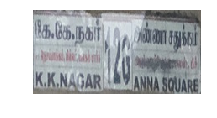

In [9]:
img = open_image('/content/drive/My Drive/bus_5routes/12G/small_IMG_3867.JPG')
img.show()


In [10]:
img.data.shape


torch.Size([3, 100, 200])

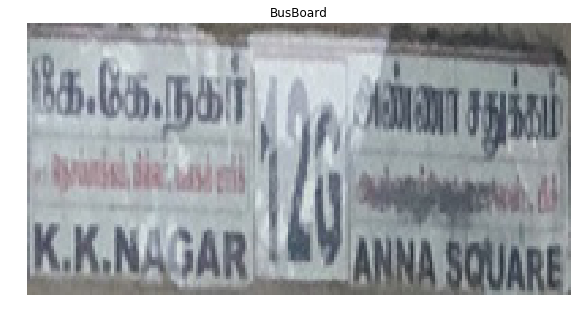

In [11]:
img.show(figsize=(100, 5), title='BusBoard')


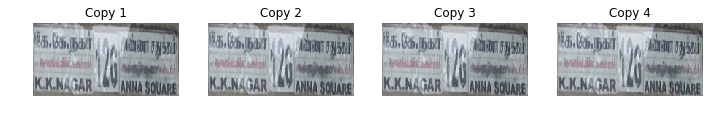

In [12]:
_,axs = plt.subplots(1,4,figsize=(12,4))
for i,ax in enumerate(axs): img.show(ax=ax, title=f'Copy {i+1}')

In [0]:
np.random.seed(2)

tfms = get_transforms(do_flip=False)

data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms)
        .databunch().
        normalize(imagenet_stats))



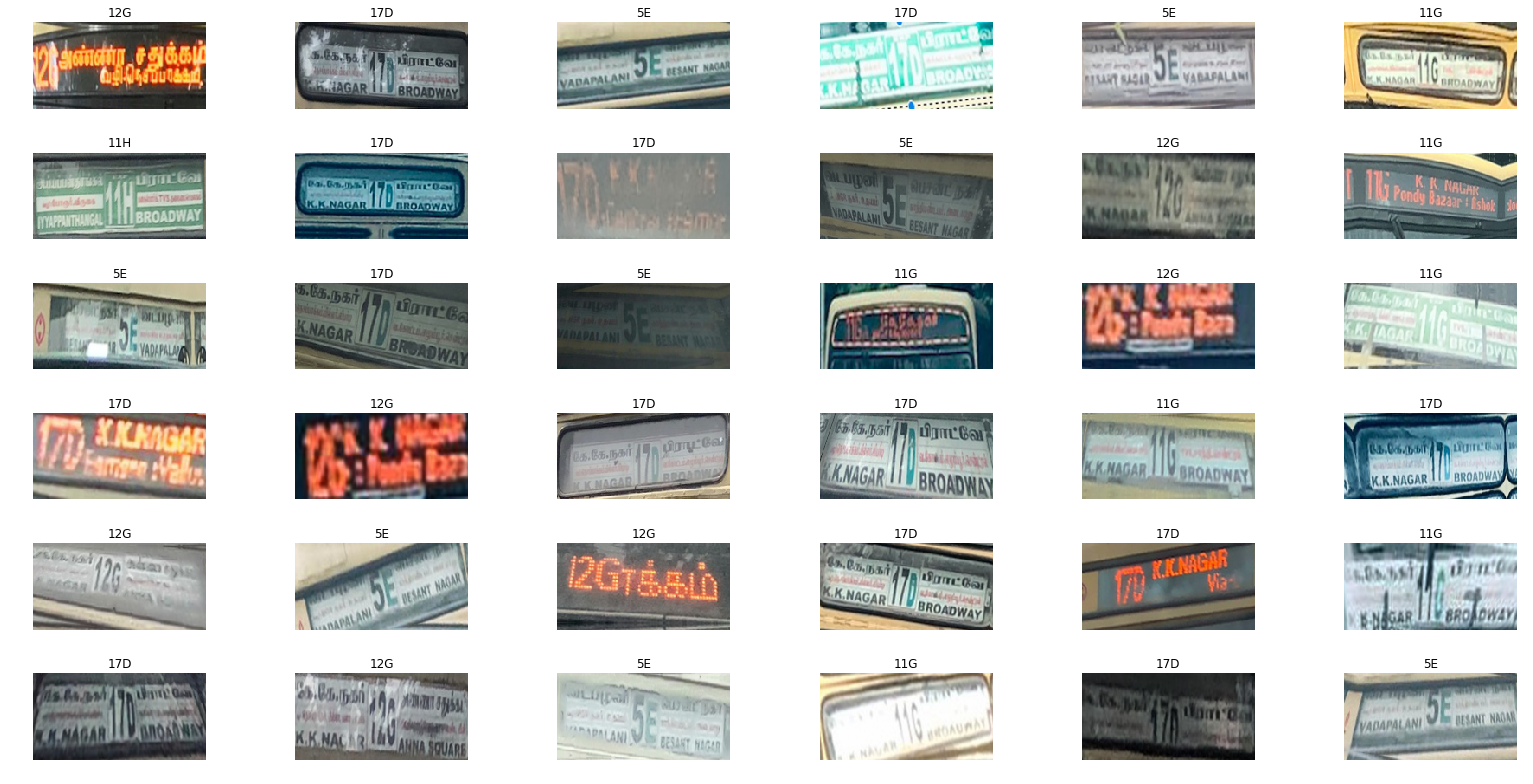

In [14]:
data.show_batch(rows=6, figsize=(22,11))


In [15]:
print(data.classes)


['11G', '11H', '12G', '17D', '5E']


In [16]:
len(data.classes)


5

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [18]:
learn.fit_one_cycle(13)


epoch,train_loss,valid_loss,error_rate
1,2.062992,1.505246,0.657895
2,1.837882,1.135186,0.377193
3,1.547851,0.871209,0.324561
4,1.314684,0.675773,0.245614
5,1.143072,0.580413,0.219298
6,1.017197,0.526955,0.192982
7,0.915442,0.513776,0.192982
8,0.825416,0.496846,0.184211
9,0.749203,0.496395,0.157895
10,0.700369,0.493201,0.157895


Checking the predictions for an image 

In [0]:
learn.save('/content/drive/My Drive/bus_5routes/stage1-fit1cycle-updatd-v1.0.44')

In [0]:
 filename = '/content/drive/My Drive/dataset_fastai/small_image193.png'


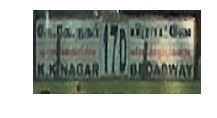

In [21]:
img = open_image(filename)
img.show()



In [22]:

losses = learn.predict(img)
losses




(Category 17D,
 tensor(3),
 tensor([5.0165e-03, 5.4126e-04, 2.2091e-02, 9.7221e-01, 1.4304e-04]))

In [0]:
filename = '/content/drive/My Drive/dataset_fastai/small_IMG_4008.JPG'


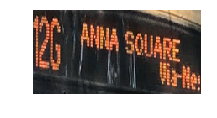

In [24]:
img = open_image(filename)
img.show()


In [25]:
losses = learn.predict(img)
losses



(Category 12G,
 tensor(2),
 tensor([5.9213e-04, 6.0849e-04, 9.8020e-01, 1.8373e-02, 2.2126e-04]))

In [0]:
filename = '/content/drive/My Drive/dataset_fastai/test1.jpg'


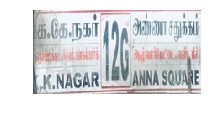

In [27]:
img = open_image(filename)
img.show()

In [28]:
losses = learn.predict(img)
losses


(Category 12G,
 tensor(2),
 tensor([4.0930e-03, 3.9806e-04, 9.8643e-01, 8.6810e-03, 3.9481e-04]))

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

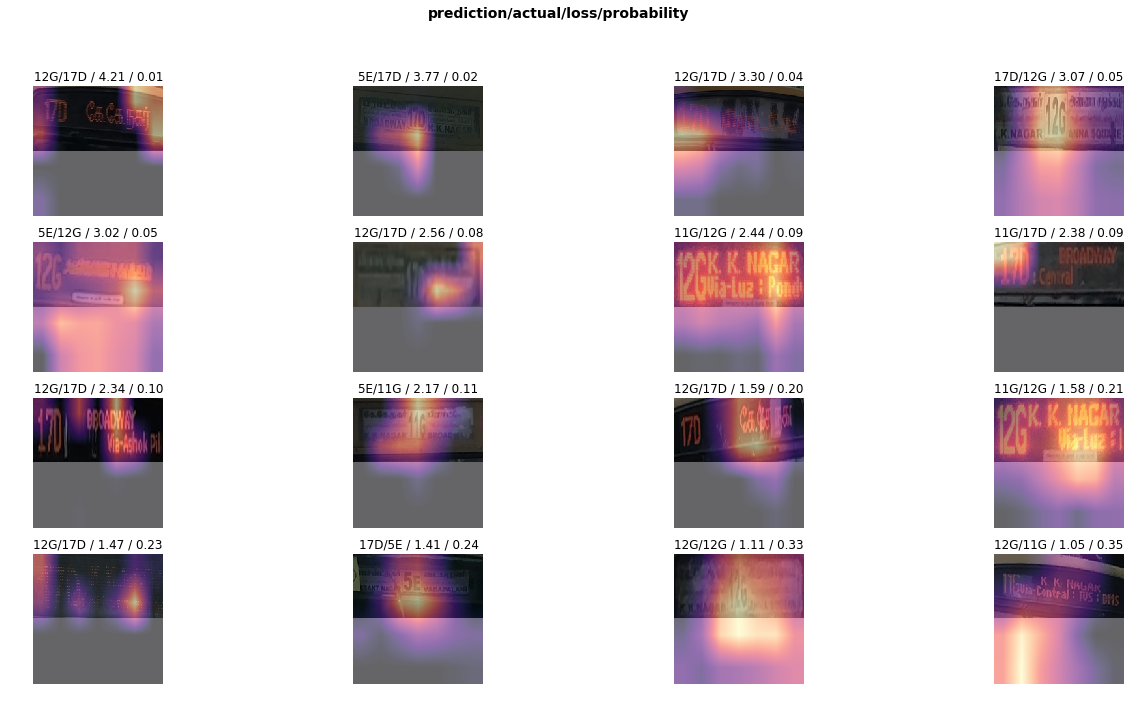

In [30]:
interp.plot_top_losses(16, figsize=(22,11))

In [31]:
interp.most_confused()

[('17D', '12G', 6),
 ('12G', '11G', 2),
 ('12G', '17D', 2),
 ('11G', '12G', 1),
 ('11G', '5E', 1),
 ('12G', '5E', 1),
 ('17D', '11G', 1),
 ('17D', '5E', 1),
 ('5E', '17D', 1)]

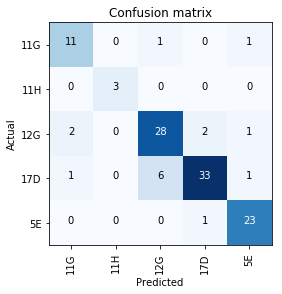

In [32]:
interp.plot_confusion_matrix()

In [33]:
learn.load('/content/drive/My Drive/bus_5routes/stage1-fit1cycle-updatd-v1.0.44')

Learner(data=ImageDataBunch;

Train: LabelList (460 items)
x: ImageItemList
Image (3, 100, 200),Image (3, 100, 200),Image (3, 100, 200),Image (3, 100, 200),Image (3, 100, 200)
y: CategoryList
17D,17D,17D,17D,17D
Path: /content/drive/My Drive/bus_5routes;

Valid: LabelList (114 items)
x: ImageItemList
Image (3, 100, 200),Image (3, 100, 200),Image (3, 100, 200),Image (3, 100, 200),Image (3, 100, 200)
y: CategoryList
11G,17D,5E,17D,17D
Path: /content/drive/My Drive/bus_5routes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentu

In [0]:
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-04


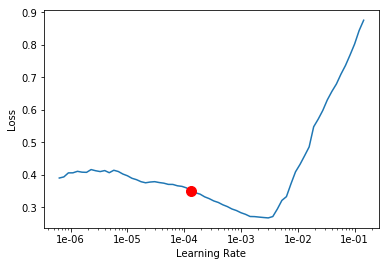

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))


epoch,train_loss,valid_loss,error_rate
1,0.412065,0.465554,0.149123
2,0.359308,0.452007,0.166667
3,0.296264,0.431264,0.140351
4,0.251362,0.305686,0.096491
5,0.221884,0.297247,0.096491


In [0]:
learn.save('/content/drive/My Drive/bus_5routes/stage1-fit1cycle-all-layers-fastai-1.0.44')

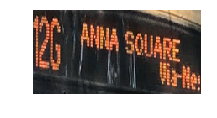

In [39]:
filename = '/content/drive/My Drive/dataset_fastai/small_IMG_4008.JPG'
img = open_image(filename)
img.show()


In [40]:
losses = learn.predict(img)
prediction = losses[0];
prediction

Category 12G

CREATING A PICKLE FILE FOR PRODUCTION

In [0]:
learn = create_cnn(data, models.resnet34).load('/content/drive/My Drive/bus_5routes/stage1-fit1cycle-all-layers-fastai-1.0.44')

In [0]:
learn.export()


In [0]:
learn = load_learner(path)

In [0]:
filename = '/content/drive/My Drive/dataset_fastai/small_IMG_4008.JPG'
img = open_image(filename)
learn.predict(img)
prediction = losses[0];
prediction